In [56]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

# import sklearn as sks

In [15]:
data_path = Path().resolve().parent / 'Res/csv/SOCR-HeightWeight.csv'

In [16]:
df = pd.read_csv(data_path)

In [17]:
def pound_to_kg(pounds):
    return pounds * 0.453592

def inches_to_cm(inches):
    return inches * 2.54

In [18]:
df['height_cm'] = df['Height(Inches)'].map(inches_to_cm)
df['weight_kg'] = df['Weight(Pounds)'].map(pound_to_kg)

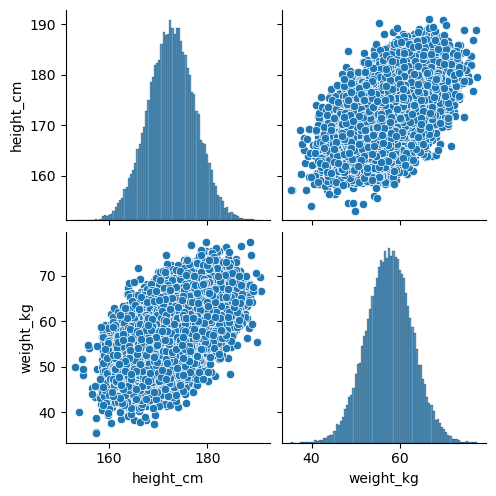

In [19]:
sns.pairplot(data=df[['height_cm', 'weight_kg']])

In [20]:
data = df[['height_cm', 'weight_kg']]

In [21]:
data_centered = data - np.mean(data, axis=0)

In [22]:
covar_mat = np.cov(data_centered,rowvar=False)

In [24]:
eigenvalues, eigenvectors = np.linalg.eigh(covar_mat)

In [25]:
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]


In [26]:
sorted_eigenvectors

array([[ 0.64113259, -0.76743013],
       [ 0.76743013,  0.64113259]])

In [59]:
data_PCA = np.dot(data_centered, sorted_eigenvectors)

In [58]:
data_PCA = data_PCA #+ np.mean(data, axis=0).values

Text(0, 0.5, 'Weight')

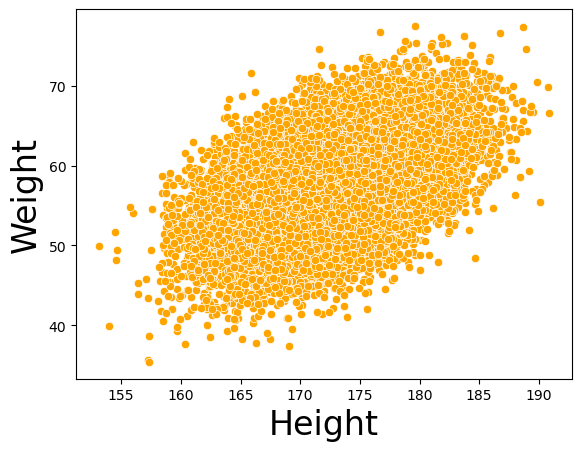

In [61]:
sns.scatterplot(x=data.iloc[:,0], y=data.iloc[:,1], color='orange')
plt.xlabel('Height', fontsize=24)
plt.ylabel('Weight', fontsize=24)

Text(0, 0.5, 'Build')

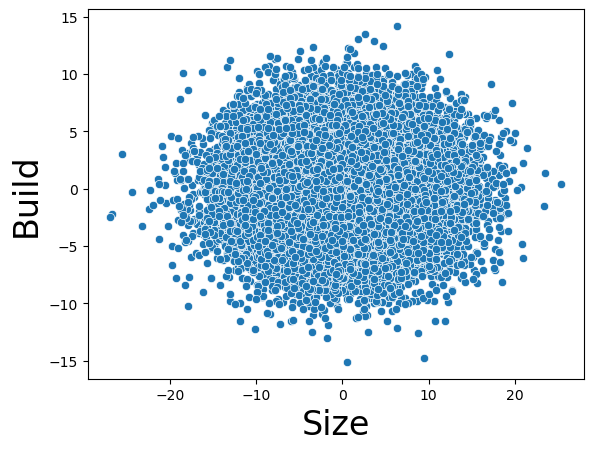

In [62]:
sns.scatterplot(x=data_PCA[:,0], y=data_PCA[:,1])
plt.xlabel('Size', fontsize=24)
plt.ylabel('Build', fontsize=24)